In [1]:
import pandas as pd
import numpy as np
import ast
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import datetime

# 使用等權重分配，檢視牛熊預測結果

In [2]:
BBPredict = pd.read_csv('/Users/arthur/Desktop/bbmarket/BBPredict_v3.csv').fillna('[]')
label = pd.read_csv('/Users/arthur/Desktop/bbmarket/algoDefLabel.csv')
label['bb'] = label['algoDefine'].apply(lambda x: int(x))

In [3]:
def NaNmean(x):
    x = [float(i) for i in x]
    return np.nanmean(x)

def floatlabel(x, delay):
    delay = -(delay+1)
    x = [float(i) for i in x]
    
    if len(x) > 0:
        return x[delay]
    else:
        return float('nan')

def str_replace(string):
    if type(string)==str:
        string = string.replace('\'nan\' ', '')
        string = string.replace(' ', ', ')
        return string
    else:
        return string

def intlabel(x, thres):
    if x > thres:
        return 1
#     elif x < (1-thres):
#         return 0
    else:
        return 0
    
def intlabel2(x, thres):
    if x > thres:
        return 1
    elif x < (1-thres):
        return 0
    else:
        return -1

In [4]:
BBPredict['PredictLabel'] = BBPredict['PredictLabel'].apply(str_replace)

BBPredict['PredictLabel1'] = BBPredict['PredictLabel1'].apply(str_replace)

BBPredict['PredictLabel5'] = BBPredict['PredictLabel5'].apply(str_replace)

BBPredict['PredictLabel10'] = BBPredict['PredictLabel10'].apply(str_replace)

BBPredict['PredictLabel15'] = BBPredict['PredictLabel15'].apply(str_replace)

BBPredict['PredictLabel20'] = BBPredict['PredictLabel20'].apply(str_replace)

BBPredict['PredictLabel30'] = BBPredict['PredictLabel30'].apply(str_replace)

BBPredict['PredictLabelMean'] = BBPredict['PredictLabelMean'].apply(str_replace)

BBPredict = BBPredict.replace('[]', float('nan'))
# BBPredict['PredictLabelMean'] = BBPredict['PredictLabel'].apply(lambda x:NaNmean(x))
# BBPredict['PredictLabel1'] = BBPredict['PredictLabel'].apply(lambda x:floatlabel(x, delay=0))
# BBPredict['PredictLabel5'] = BBPredict['PredictLabel'].apply(lambda x:floatlabel(x, delay=1))
# BBPredict['PredictLabel10'] = BBPredict['PredictLabel'].apply(lambda x:floatlabel(x, delay=2))
# BBPredict['PredictLabel15'] = BBPredict['PredictLabel'].apply(lambda x:floatlabel(x, delay=3))
# BBPredict['PredictLabel20'] = BBPredict['PredictLabel'].apply(lambda x:floatlabel(x, delay=4))
# BBPredict['PredictLabel30'] = BBPredict['PredictLabel'].apply(lambda x:floatlabel(x, delay=5))

In [5]:
df = label.merge(BBPredict, on='Date')
df = df.dropna().reset_index(drop=True)

In [6]:
# for thres in [0.3, 0.4, 0.5, 0.6, 0.7]:
#     df['PredictLabel12'] = df['PredictLabel1'].apply(lambda x: intlabel(x, thres))
#     confusionMatrix = confusion_matrix(df['bb'], df['PredictLabel12'])
#     print(confusionMatrix)
#     if confusionMatrix.shape[0] == 2:
#         print((confusionMatrix[0,0]+confusionMatrix[1,1])/sum(sum(confusionMatrix)))
#     else:
#         print((confusionMatrix[1,1]+confusionMatrix[2,2])/sum(sum(confusionMatrix[1:, 1:])))
        
# print('\n\n\n')
        
# for thres in [0.3, 0.4, 0.5, 0.6, 0.7, 0.3]:
#     df['PredictLabel22'] = df['PredictLabel2'].apply(lambda x: intlabel(x, thres))
#     confusionMatrix = confusion_matrix(df['bb'], df['PredictLabel22'])
#     print(confusionMatrix)
#     if confusionMatrix.shape[0] == 2:
#         print((confusionMatrix[0,0]+confusionMatrix[1,1])/sum(sum(confusionMatrix)))
#     else:
#         print((confusionMatrix[1,1]+confusionMatrix[2,2])/sum(sum(confusionMatrix[1:, 1:])))

In [7]:
# for thres in [0.3, 0.4, 0.5, 0.6, 0.7]:
#     df['PredictLabel13'] = df['PredictLabel1'].apply(lambda x: intlabel2(x, thres))
#     confusionMatrix = confusion_matrix(df['bb'], df['PredictLabel13'])
#     print(confusionMatrix)
#     if confusionMatrix.shape[0] == 2:
#         print((confusionMatrix[0,0]+confusionMatrix[1,1])/sum(sum(confusionMatrix)))
#     else:
#         print((confusionMatrix[1,1]+confusionMatrix[2,2])/sum(sum(confusionMatrix[1:, 1:])))

# print('\n\n\n')
        
# for thres in [0.3, 0.4, 0.5, 0.6, 0.7]:
#     df['PredictLabel23'] = df['PredictLabel2'].apply(lambda x: intlabel2(x, thres))
#     confusionMatrix = confusion_matrix(df['bb'], df['PredictLabel23'])
#     print(confusionMatrix)
#     if confusionMatrix.shape[0] == 2:
#         print((confusionMatrix[0,0]+confusionMatrix[1,1])/sum(sum(confusionMatrix)))
#     else:
#         print((confusionMatrix[1,1]+confusionMatrix[2,2])/sum(sum(confusionMatrix[1:, 1:])))

### 最好的平均accuracy有77%（總共預測8年約1904天）

In [8]:
for i in df.Date:
    print(i)

2014/04/01
2014/04/02
2014/04/03
2014/04/07
2014/04/08
2014/04/09
2014/04/10
2014/04/11
2014/04/14
2014/04/15
2014/04/16
2014/04/17
2014/04/18
2014/04/21
2014/04/22
2014/04/23
2014/04/24
2014/04/25
2014/04/28
2014/04/29
2014/04/30
2014/05/02
2014/05/05
2014/05/06
2014/05/07
2014/05/08
2014/05/09
2014/05/12
2014/05/13
2014/05/14
2014/05/15
2014/05/16
2014/05/19
2014/05/20
2014/05/21
2014/05/22
2014/05/23
2014/05/26
2014/05/27
2014/05/28
2014/05/29
2014/05/30
2014/06/03
2014/06/04
2014/06/05
2014/06/06
2014/06/09
2014/06/10
2014/06/11
2014/06/12
2014/06/13
2014/06/16
2014/06/17
2014/06/18
2014/06/19
2014/06/20
2014/06/23
2014/06/24
2014/06/25
2014/06/26
2014/06/27
2014/06/30
2014/07/01
2014/07/02
2014/07/03
2014/07/04
2014/07/07
2014/07/08
2014/07/09
2014/07/10
2014/07/11
2014/07/14
2014/07/15
2014/07/16
2014/07/17
2014/07/18
2014/07/21
2014/07/22
2014/07/24
2014/07/25
2014/07/28
2014/07/29
2014/07/30
2014/07/31
2014/08/01
2014/08/04
2014/08/05
2014/08/06
2014/08/07
2014/08/08
2014/08/11

In [9]:
# print((8*365-90)*5/7)
# tmp = label.loc[label['Date']>'2014/03/31', :]
# tmp = tmp.loc[tmp['Date']<'2022/01/01', :]
# print(tmp.shape[0])
# print(sum(sum(confusionMatrix)))
# print(BBPredict.dropna().shape[0])

# 加入溢酬資料

In [10]:
def extractPremium(name):
    Premium = pd.read_csv('/Users/arthur/Desktop/bbmarket/index_data/'+name+'_Premium.csv')
    Premium.columns = ['年月日', 'HighGroup', 'LowGroup']
    Premium[name+'_Premium'] = Premium.apply(lambda x: x[1]-x[2], axis=1)
    Premium['年月日'] = [i[0:4]+'/'+i[5:7]+'/'+i[8:10] for i in Premium['年月日']]
    
    cumuPre = []
    startPre = 1
    for i in Premium.index:
        month, date = Premium.loc[i, '年月日'].split('/')[1:3]   
        startPre = startPre*(1+Premium.loc[i, name+'_Premium'])
        cumuPre.append(startPre)
        if [month, date] in [['03', '31'], ['05', '31'], ['08', '31'], ['11', '30']]:
            startPre = 1
    
    Premium[name+'_Cumu_Premium'] = cumuPre
    return Premium

CTP_Premium = extractPremium('CTP')
EB_Premium = extractPremium('EB')
EP_Premium = extractPremium('EP')
VOL_Premium = extractPremium('VOL')
MOM_Premium = extractPremium('MOM')
SEN_Premium = extractPremium('SEN')
HEAT_Premium = extractPremium('HEAT')
WB_Premium = extractPremium('WB')

In [11]:
CTP_Premium

,年月日,HighGroup,LowGroup,CTP_Premium,CTP_Cumu_Premium
0,2010/05/31,1.006855,1.015689,-0.008834,0.991166
1,2010/06/01,1.000888,0.993379,0.007509,1.007509
2,2010/06/02,0.980336,0.993008,-0.012671,0.994742
3,2010/06/03,1.024971,1.021751,0.003220,0.997945
4,2010/06/04,0.993378,0.997610,-0.004231,0.993723
...,...,...,...,...,...
4287,2022/02/24,0.978852,0.967726,0.011125,1.047190
4288,2022/02/25,1.002163,1.016042,-0.013879,1.032656
4289,2022/02/26,1.000000,1.000000,0.000000,1.032656
4290,2022/02/27,1.000000,1.000000,0.000000,1.032656


In [12]:
%matplotlib inline

def draw(factor_Cumu_Premium, name):
    fig = plt.figure(figsize=(15,4))
    ax = plt.axes()

    ax.plot(pd.to_datetime(factor_Cumu_Premium.年月日), factor_Cumu_Premium.iloc[:, -1], label=name+'_Cumulative_Premium')
    ax.plot(pd.to_datetime(factor_Cumu_Premium.年月日), len(factor_Cumu_Premium.iloc[:, -1])*[1], label='Benchmark')

    ax.set_xlabel('time')  # Add an x-label to the axes.
    ax.set_ylabel('factor premium')  # Add a y-label to the axes.
    
    xcoords = []
    for year in range(2010, 2022):
        for month in [4, 6, 9, 12]:
            xcoords.append(datetime.date(year, month, 1)-datetime.timedelta(days=1))
    for xc in xcoords:
        plt.axvline(x=xc, ymin=0.40, ymax=0.60, color='purple', ls='--')
    
#     plt.axvline(x=datetime.date(2015, 6, 1)-datetime.timedelta(days=1), ymin=0.30, ymax=0.70, color='green', ls='--')
#     plt.axvline(x=datetime.date(2015, 9, 1)-datetime.timedelta(days=1), ymin=0.30, ymax=0.70, color='green', ls='--')
#     plt.axvline(x=datetime.date(2015, 12, 1)-datetime.timedelta(days=1), ymin=0.30, ymax=0.70, color='green', ls='--')
#     plt.axvline(x=datetime.date(2018, 6, 1)-datetime.timedelta(days=1), ymin=0.30, ymax=0.70, color='green', ls='--')
#     plt.axvline(x=datetime.date(2018, 9, 1)-datetime.timedelta(days=1), ymin=0.30, ymax=0.70, color='green', ls='--')
#     plt.axvline(x=datetime.date(2018, 12, 1)-datetime.timedelta(days=1), ymin=0.30, ymax=0.70, color='green', ls='--')
    plt.axvline(x=datetime.date(2015, 4, 28)-datetime.timedelta(days=1), ymin=0.30, ymax=0.70, color='green', ls='--')
    plt.axvline(x=datetime.date(2016, 1, 21)-datetime.timedelta(days=1), ymin=0.30, ymax=0.70, color='green', ls='--')
    plt.axvline(x=datetime.date(2018, 6, 11)-datetime.timedelta(days=1), ymin=0.30, ymax=0.70, color='green', ls='--')
    plt.axvline(x=datetime.date(2019, 1, 4)-datetime.timedelta(days=1), ymin=0.30, ymax=0.70, color='green', ls='--')
    
    ax.legend();  # Add a legend.

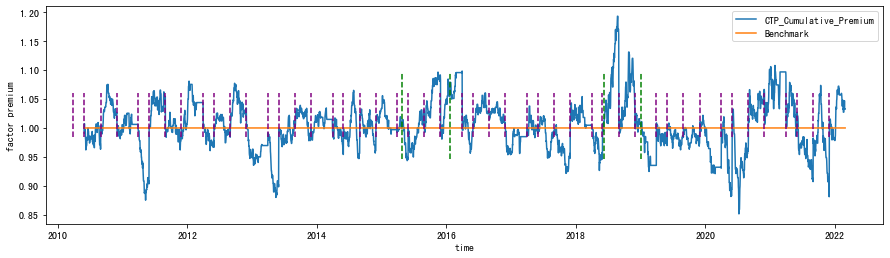

In [13]:
draw(CTP_Premium, 'CTP')

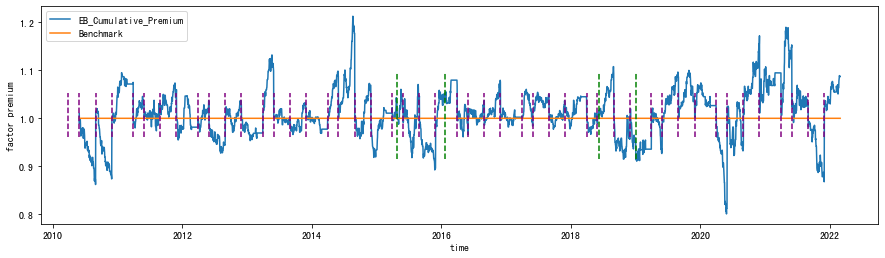

In [14]:
draw(EB_Premium, 'EB')

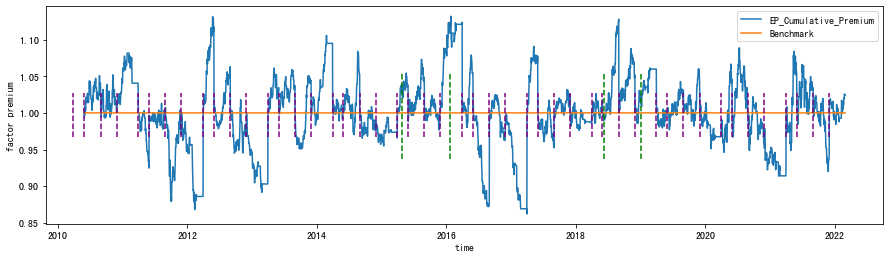

In [15]:
draw(EP_Premium, 'EP')

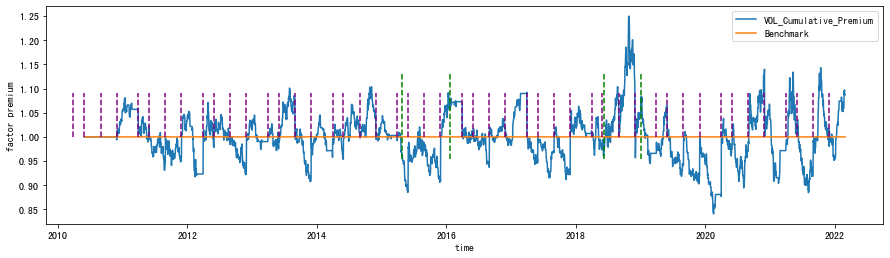

In [16]:
draw(VOL_Premium, 'VOL')

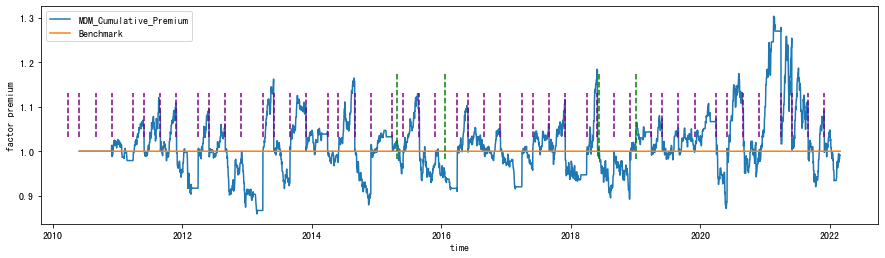

In [17]:
draw(MOM_Premium, 'MOM')

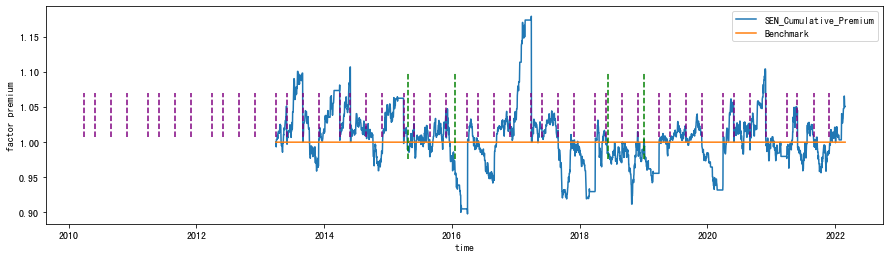

In [18]:
draw(SEN_Premium, 'SEN')

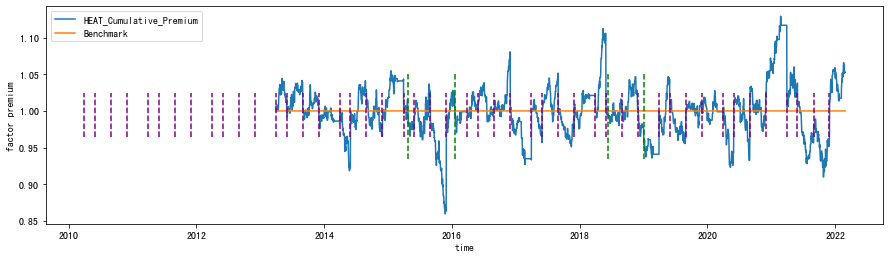

In [19]:
draw(HEAT_Premium, 'HEAT')

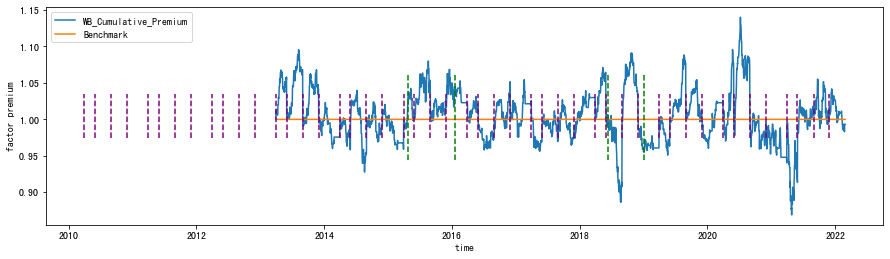

In [20]:
draw(WB_Premium, 'WB')

## Bull: EB, EP, MOM, SEN 

## Bear: CTP, EP, VOL, WB

# 結合ij4_Model_2

In [21]:
import pandas as pd
import numpy as np
from pandas.core.arrays.sparse import dtype
# from model_v1 import MinRiskByHistoricalVar
import matplotlib.pyplot as plt
import ffn
import dask.dataframe
import os
import warnings
import copy
import sklearn as sk
import cvxpy as cvx
import datetime
import matplotlib.pyplot as plt
os.chdir('/Users/arthur/Desktop/factor_investment')

(CVXPY) Aug 18 10:47:05 AM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/lib/python3.9/site-packages/_scs_direct.cpython-39-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/lib/python3.9/site-packages/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/lib/python3.9/site-packages/scs/.dylibs/libgomp.1.dylib')


標準化個因子
考量市值大小
方向變化（正相關 負相關）
缺值等權合成
中性化（https://heatask.com/photograph/69198.html）


In [22]:
def nor(lis):
    lis = (np.array(lis) - np.nanmean(lis)) / (np.nanvar(lis))**(1/2)
    return lis

In [23]:
def get_optimal_weights(covariance_matrix, IRIC):

    num_of_weights = covariance_matrix.shape[0]
    
    x = cvx.Variable(num_of_weights)
    
    portfolio_variance = cvx.quad_form(x, covariance_matrix)
    
#     objective = cvx.Minimize(portfolio_variance)
    objective = cvx.Maximize(x@IRIC - 1/2*portfolio_variance)
#     print(x@IRIC , portfolio_variance)
    
    constraints = [x >= 0, sum(x) == 1]
#     constraints = [sum(x) == 1]
   
    problem = cvx.Problem(objective, constraints)
    problem.solve()
    
    x_values = x.value
    return x_values

def get_weights(covariance_matrix):

    num_of_weights = covariance_matrix.shape[0]
    
    x = cvx.Variable(num_of_weights)
    
    portfolio_variance = cvx.quad_form(x, covariance_matrix)
    
    objective = cvx.Minimize(portfolio_variance)
#     objective = cvx.Maximize(x@IRIC - 1/2*portfolio_variance)
#     print(x@IRIC , portfolio_variance)
    
    constraints = [x >= 0, sum(x) == 1]
#     constraints = [sum(x) == 1]
   
    problem = cvx.Problem(objective, constraints)
    problem.solve()
    
    x_values = x.value
    return x_values

In [24]:
def mul(return_list):
    return_list = return_list[~(np.isnan(return_list))]
    new_return = 1
    for i in return_list:
        new_return = new_return*i
    
    return new_return

In [25]:
candidatePoolDF=pd.read_excel('./計算溢酬/CTBCdata/10個因子原始資料.xlsx','125檔', dtype=str,index_col=0,header=1)
# factor_size=pd.read_csv('./CTBCdata/419valuefactor.csv', index_col=0)
CTP=pd.read_excel('./計算溢酬/CTBCdata/factorvalues.xlsx','CTP', index_col=0)
EB=pd.read_excel('./計算溢酬/CTBCdata/factorvalues.xlsx','EB', index_col=0)
EP=pd.read_excel('./計算溢酬/CTBCdata/factorvalues.xlsx','EP', index_col=0)
MOM=pd.read_excel('./計算溢酬/CTBCdata/factorvalues.xlsx','MOM', index_col=0)
VOL=pd.read_excel('./計算溢酬/CTBCdata/factorvalues.xlsx','VOL', index_col=0)
SEN=pd.read_excel('./計算溢酬/CTBCdata/factorvalues_sentiment.xlsx','sentiment_2', index_col=0)
WB=pd.read_excel('./計算溢酬/CTBCdata/factorvalues_sentiment.xlsx','WB', index_col=0)

In [26]:
# NoBenchmarkPool=list(candidatePoolDF.index)
# candidatePool=['0050']+NoBenchmarkPool

candidatePool=list(candidatePoolDF.index)

candidatePool=[str(x) for x in candidatePool]
candidatePool.sort()
candidatePool = ['50']+candidatePool
print(candidatePool)
print(len(candidatePool))

['50', '1101', '1102', '1216', '1227', '1301', '1303', '1326', '1402', '1476', '1504', '1565', '1590', '1722', '1802', '2002', '2049', '2105', '2201', '2207', '2227', '2301', '2303', '2308', '2317', '2324', '2327', '2330', '2337', '2344', '2345', '2347', '2353', '2354', '2356', '2357', '2371', '2377', '2379', '2382', '2385', '2395', '2408', '2409', '2412', '2454', '2474', '2492', '2498', '2603', '2609', '2610', '2615', '2618', '2633', '2801', '2823', '2834', '2880', '2881', '2882', '2883', '2884', '2885', '2886', '2887', '2888', '2890', '2891', '2892', '2912', '2915', '3008', '3034', '3037', '3045', '3105', '3176', '3231', '3293', '3481', '3529', '3532', '3552', '3673', '3682', '3702', '3711', '4147', '4157', '4174', '4743', '4904', '4938', '4958', '4966', '5269', '5347', '5483', '5530', '5871', '5876', '5880', '5903', '5904', '6121', '6147', '6239', '6415', '6446', '6456', '6488', '6505', '6669', '8044', '8046', '8069', '8299', '8406', '8436', '8454', '8464', '9904', '9910', '9921', '

In [27]:
CTP = CTP[CTP.index.astype('str').isin(candidatePool)]
EB = EB[EB.index.astype('str').isin(candidatePool)]
EP = EP[EP.index.astype('str').isin(candidatePool)]
MOM= MOM[MOM.index.astype('str').isin(candidatePool)]
VOL = VOL[VOL.index.astype('str').isin(candidatePool)]

CTP = CTP[CTP.index.isin(SEN.index)]
EB = EB[EB.index.isin(SEN.index)]
EP = EP[EP.index.isin(SEN.index)]
MOM= MOM[MOM.index.isin(SEN.index)]
VOL = VOL[VOL.index.isin(SEN.index)]
SEN = SEN[SEN.index.isin(CTP.index)]
WB = WB[WB.index.isin(CTP.index)]
#
CTP = CTP.loc[:, CTP.columns.isin(SEN.columns)]
EB = EB.loc[:, EB.columns.isin(SEN.columns)]
EP = EP.loc[:, EP.columns.isin(SEN.columns)]
MOM = MOM.loc[:, MOM.columns.isin(SEN.columns)]
VOL = VOL.loc[:, VOL.columns.isin(SEN.columns)]
#
CTP = CTP.fillna(np.nan)
EB = EB.fillna(np.nan)
EP = EP.fillna(np.nan)
MOM = MOM.fillna(np.nan)
VOL = VOL.fillna(np.nan)

#####
# SEN = SEN.fillna(0)
SEN = SEN.fillna(method='ffill')
WB = WB.fillna(0.5)

In [28]:
print(CTP.shape)
print(SEN.shape)
print(WB.shape)

(108, 36)
(108, 36)
(108, 36)


In [29]:
weights_df = pd.DataFrame()
bear_weights_df = pd.DataFrame()

CTP_Value = copy.copy(CTP) # 標準化
EB_Value = copy.copy(EB)
EP_Value = copy.copy(EP)
VOL_Value = copy.copy(VOL)
MOM_Value = copy.copy(MOM)
SEN_Value = copy.copy(SEN)
WB_Value = copy.copy(WB)

for i in range(CTP.shape[1]):
#     index = CTP.iloc[:, i].values == CTP.iloc[:, i].values
    CTP_value = nor(CTP.iloc[:, i])
    CTP_Value.iloc[:, i] = CTP_value
    
    EB_value = nor(EB.iloc[:, i])
    EB_Value.iloc[:, i] = EB_value
    
    EP_value = nor(EP.iloc[:, i])
    EP_Value.iloc[:, i] = EP_value
    
    MOM_value = nor(MOM.iloc[:, i])
    MOM_Value.iloc[:, i] = MOM_value
    
    VOL_value = nor(VOL.iloc[:, i])
    VOL_Value.iloc[:, i] = VOL_value
    
    SEN_value = nor(SEN.iloc[:, i])
    SEN_Value.iloc[:, i] = SEN_value
    
    WB_value = nor(WB.iloc[:, i])
    WB_Value.iloc[:, i] = WB_value

for i in range(CTP.shape[1]):
    index = np.logical_and(CTP_Value.iloc[:, i].values == CTP_Value.iloc[:, i].values, EB_Value.iloc[:, i].values == EB_Value.iloc[:, i].values)
    index = np.logical_and(index, EP_Value.iloc[:, i].values == EP_Value.iloc[:, i].values)
    index = np.logical_and(index, MOM_Value.iloc[:, i].values == MOM_Value.iloc[:, i].values)
    index = np.logical_and(index, VOL_Value.iloc[:, i].values == VOL_Value.iloc[:, i].values)
    index = np.logical_and(index, SEN_Value.iloc[:, i].values == SEN_Value.iloc[:, i].values)
    index = np.logical_and(index, WB_Value.iloc[:, i].values == WB_Value.iloc[:, i].values)

    CTP_value = CTP_Value.iloc[:, i].values[index]
    EB_value = EB_Value.iloc[:, i].values[index]
    EP_value = EP_Value.iloc[:, i].values[index]
    MOM_value = MOM_Value.iloc[:, i].values[index]
    VOL_value = VOL_Value.iloc[:, i].values[index]
    SEN_value = SEN_Value.iloc[:, i].values[index]
    WB_value = WB_Value.iloc[:, i].values[index]
    

#     covMatrix = np.cov(np.array([CTP_value, EB_value, EP_value, VOL_value, MOM_value, SEN_value, WB_value]))
    covMatrix = np.cov(np.array([EB_value, EP_value, MOM_value, SEN_value]))
    bearMatrix = np.cov(np.array([CTP_value, EP_value, VOL_value, WB_value]))
    
    IRIC = []
    IRIC.append(EB_Premium.loc[pd.to_datetime(EB_Premium['年月日'])==CTP.columns[i], :].values[0][-1])
    IRIC.append(EP_Premium.loc[pd.to_datetime(EP_Premium['年月日'])==CTP.columns[i], :].values[0][-1])
    IRIC.append(MOM_Premium.loc[pd.to_datetime(MOM_Premium['年月日'])==CTP.columns[i], :].values[0][-1])
    IRIC.append(SEN_Premium.loc[pd.to_datetime(SEN_Premium['年月日'])==CTP.columns[i], :].values[0][-1])
    weights_df[CTP.columns[i]] = get_weights(covMatrix)
    
    
    
    IRIC = []
    IRIC.append(CTP_Premium.loc[pd.to_datetime(CTP_Premium['年月日'])==CTP.columns[i], :].values[0][-1])
    IRIC.append(EP_Premium.loc[pd.to_datetime(EP_Premium['年月日'])==CTP.columns[i], :].values[0][-1])
    IRIC.append(VOL_Premium.loc[pd.to_datetime(VOL_Premium['年月日'])==CTP.columns[i], :].values[0][-1])
    IRIC.append(WB_Premium.loc[pd.to_datetime(WB_Premium['年月日'])==CTP.columns[i], :].values[0][-1])
    bear_weights_df[CTP.columns[i]] = get_weights(bearMatrix)

In [30]:
current_index = pd.DataFrame()
for i in weights_df.columns:
    weight = weights_df[i]
    current_index[i] = weight[0]*EB_Value[i] + weight[1]*EP_Value[i] + weight[2]*MOM_Value[i] + weight[3]*SEN_Value[i]
#     current_index[i] = weight[0]*CTP_Value[i] + weight[1]*EB_Value[i] + weight[2]*EP_Value[i] + weight[3]*VOL_Value[i] + weight[4]*MOM_Value[i] + weight[5]*SEN_Value[i] + weight[6]*WB_Value[i]
#     current_index[i] = 0*CTP_Value[i] + 1*EB_Value[i] + 1*EP_Value[i] + 2*MOM_Value[i] + 0*VOL_Value[i] + 0*SEN_Value[i]

current_index.index = current_index.index.astype('str')
current_index = current_index[current_index.index.isin(candidatePool)]

In [31]:
bear_current_index = pd.DataFrame()
for i in bear_weights_df.columns:
    weight = bear_weights_df[i]
    bear_current_index[i] = weight[0]*CTP_Value[i] + weight[1]*EP_Value[i] + weight[2]*VOL_Value[i] + weight[3]*WB_Value[i]
#     current_index[i] = weight[0]*CTP_Value[i] + weight[1]*EB_Value[i] + weight[2]*EP_Value[i] + weight[3]*VOL_Value[i] + weight[4]*MOM_Value[i] + weight[5]*SEN_Value[i] + weight[6]*WB_Value[i]
#     current_index[i] = 0*CTP_Value[i] + 1*EB_Value[i] + 1*EP_Value[i] + 2*MOM_Value[i] + 0*VOL_Value[i] + 0*SEN_Value[i]

bear_current_index.index = bear_current_index.index.astype('str')
bear_current_index = bear_current_index[bear_current_index.index.isin(candidatePool)]

In [32]:
def highgroup(factor_df):
    high_group = pd.DataFrame()

    for i in factor_df.columns:
        values = factor_df.loc[:, i].values
        values = values[~np.isnan(values)]
        num = round(len(values)/5)
        top_index = factor_df.index[ np.argpartition(values, -num)[-num:] ]

        df = pd.DataFrame({i:top_index}).astype('str')
        high_group = pd.concat([high_group, df], ignore_index=True, axis=1)

    high_group.columns = factor_df.columns
    return high_group
        
def lowgroup(factor_df):
    low_group = pd.DataFrame()

    for i in factor_df.columns:
        values = factor_df.loc[:, i].values
        values = values[~np.isnan(values)]
        num = round(len(values)/5)
        low_index = factor_df.index[ np.argpartition(values, num)[0:num] ]

        df = pd.DataFrame({i:low_index}).astype('str')
        low_group = pd.concat([low_group, df], ignore_index=True, axis=1)

    low_group.columns = factor_df.columns
    return low_group

In [33]:
high_selected_stock = highgroup(current_index)
high_selected_stock = high_selected_stock.astype('str')
high_selected_stock.columns = high_selected_stock.columns.date

low_selected_stock = lowgroup(bear_current_index)
low_selected_stock = low_selected_stock.astype('str')
low_selected_stock.columns = low_selected_stock.columns.date

In [34]:
try:
    prices = pd.read_csv('./計算溢酬/CTBCdata/prices.csv', index_col=0)
#     print(prices)
except:
    col_list = ["證券代碼", "簡稱", "年月日", "收盤價(元)"]
    price = pd.read_csv('./data/TEJ_StockPrice_20052022.csv', encoding='big5', encoding_errors='ignore', usecols=col_list)
    price["證券代碼"] = [str(x).strip() for x in price["證券代碼"]]
    price["簡稱"] = [x.strip() for x in price["簡稱"]]
    price.年月日 = pd.to_datetime(price.年月日).dt.date
    
    prices = pd.DataFrame(columns = candidatePool)
    for i in price.index:
        coid = price.loc[i, "證券代碼"]
        if coid in candidatePool: # 只抓125檔的價格
            date = price.loc[i, "年月日"]
            close = price.loc[i, "收盤價(元)"]
            prices.loc[date, coid] = close
            if (i % 10000) == 0:
                print(i//10000, end=' ')
    for i in pd.date_range(start='2005-01-03', end='2022-05-16').date:
        if i not in prices.index.values:
    #         print(i)
            prices.loc[i, :] = [np.nan]*126

    prices = prices.sort_index()
    prices = prices.fillna(method='ffill')
    prices.to_csv('./計算溢酬/CTBCdata/prices.csv')
    prices
    
prices.index = prices.index.astype('datetime64[ns]').date

In [35]:
import time
# time.sleep(10)

In [36]:
for delay in [1, 5, 10 ,15, 20, 30]:

    return_df = pd.DataFrame( index = [0, 1], columns=pd.date_range( start=str(high_selected_stock.columns[0]+datetime.timedelta(days=0)), end=str(high_selected_stock.columns[-1]+ datetime.timedelta(days=90)) ).date )
    cumu_return = copy.copy(return_df)
    # num_buy = copy.copy(selected_stock)

    df['Date'] = pd.to_datetime(df['Date']).dt.date

    for j in range(high_selected_stock.shape[1]):
        start_date = high_selected_stock.columns[j] + datetime.timedelta(days=0)
        end_date = high_selected_stock.columns[j] + datetime.timedelta(days=90)


        predictBB = df.loc[df['Date']>=start_date].reset_index(drop=True)
        predictBB = predictBB.loc[predictBB['Date']<=high_selected_stock.columns[j] + datetime.timedelta(days=delay)].reset_index(drop=True)

        strategy = ''
        print(high_selected_stock.columns[j], np.mean(predictBB['PredictLabel'+str(delay)]))

2013-03-31 nan
2013-05-31 nan
2013-08-31 nan
2013-11-30 nan
2014-03-31 1.0
2014-05-31 nan
2014-08-31 1.0
2014-11-30 0.99
2015-03-31 0.845
2015-05-31 0.12
2015-08-31 0.22999999999999998
2015-11-30 0.215
2016-03-31 0.77
2016-05-31 0.89
2016-08-31 0.88
2016-11-30 0.9550000000000001
2017-03-31 0.93
2017-05-31 0.665
2017-08-31 0.755
2017-11-30 0.35500000000000004
2018-03-31 0.25
2018-05-31 0.59
2018-08-31 0.63
2018-11-30 0.38
2019-03-31 0.92
2019-05-31 0.72
2019-08-31 nan
2019-11-30 nan
2020-03-31 0.895
2020-05-31 0.98
2020-08-31 0.8049999999999999
2020-11-30 0.755
2021-03-31 0.67
2021-05-31 0.895
2021-08-31 0.825
2021-11-30 0.9199999999999999
2013-03-31 nan
2013-05-31 nan
2013-08-31 nan
2013-11-30 nan
2014-03-31 1.0
2014-05-31 0.9766666666666666
2014-08-31 1.0
2014-11-30 0.9799999999999999
2015-03-31 0.9433333333333334
2015-05-31 0.124
2015-08-31 0.08199999999999999
2015-11-30 0.10200000000000001
2016-03-31 0.765
2016-05-31 0.944
2016-08-31 0.94
2016-11-30 0.9875
2017-03-31 0.465
2017-05-3

2013-03-31 2013-06-29 bull
2013-05-31 2013-08-29 bull
2013-08-31 2013-11-29 bull
2013-11-30 2014-02-28 bull
2014-03-31 2014-06-29 bull
2014-05-31 2014-08-29 bull
2014-08-31 2014-11-29 bull
2014-11-30 2015-02-28 bull
2015-03-31 2015-06-29 bull
2015-05-31 2015-08-29 bear
2015-08-31 2015-11-29 bull
2015-11-30 2016-02-28 bear
2016-03-31 2016-06-29 bull
2016-05-31 2016-08-29 bull
2016-08-31 2016-11-29 bull
2016-11-30 2017-02-28 bull
2017-03-31 2017-06-29 bear
2017-05-31 2017-08-29 bull
2017-08-31 2017-11-29 bull
2017-11-30 2018-02-28 bear
2018-03-31 2018-06-29 bear
2018-05-31 2018-08-29 bull
2018-08-31 2018-11-29 bear
2018-11-30 2019-02-28 bear
2019-03-31 2019-06-29 bull
2019-05-31 2019-08-29 bull
2019-08-31 2019-11-29 bull
2019-11-30 2020-02-28 bull
2020-03-31 2020-06-29 bull
2020-05-31 2020-08-29 bull
2020-08-31 2020-11-29 bull
2020-11-30 2021-02-28 bull
2021-03-31 2021-06-29 bull
2021-05-31 2021-08-29 bull
2021-08-31 2021-11-29 bull
2021-11-30 2022-02-28 bull


/var/folders/w8/jwxq4stj29506b1pf67xpb000000gq/T/ipykernel_1542/1805799828.py:66: RuntimeWarning: Mean of empty slice
  return_df.iloc[1, i] = np.nanmean(return_df.iloc[1, i] )
/var/folders/w8/jwxq4stj29506b1pf67xpb000000gq/T/ipykernel_1542/1805799828.py:65: RuntimeWarning: Mean of empty slice
  return_df.iloc[0, i] = np.nanmean(return_df.iloc[0, i] )


{'IRR': 0.3349430401697602}
{'IRR': 0.14288979378583466}


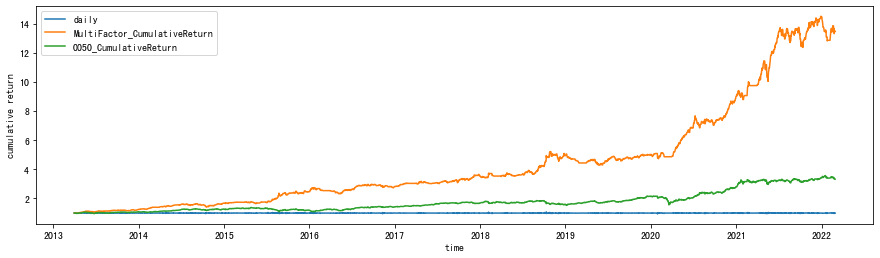

In [37]:
%matplotlib inline

cumu_return = pd.DataFrame()

for delay in [30]:

    return_df = pd.DataFrame( index = [0, 1], columns=pd.date_range( start=str(high_selected_stock.columns[0]+datetime.timedelta(days=0)), end=str(high_selected_stock.columns[-1]+ datetime.timedelta(days=90)) ).date )
    cumu_return = copy.copy(return_df)
    # num_buy = copy.copy(selected_stock)

    df['Date'] = pd.to_datetime(df['Date']).dt.date

    for j in range(high_selected_stock.shape[1]):
        start_date = high_selected_stock.columns[j] + datetime.timedelta(days=0)
        end_date = high_selected_stock.columns[j] + datetime.timedelta(days=90)


        predictBB = df.loc[df['Date']>=start_date].reset_index(drop=True)
        predictBB = predictBB.loc[predictBB['Date']<=high_selected_stock.columns[j] + datetime.timedelta(days=delay)].reset_index(drop=True)

        strategy = ''
        if np.mean(predictBB['PredictLabel'+str(delay)]) < 0.3:
            strategy = 'bear'
        else:
            strategy = 'bull'
#         strategy = 'bull'
        print(start_date, end_date, strategy)

        if strategy == 'bull':
            selected_stock = high_selected_stock
        elif strategy == 'bear':
            selected_stock = low_selected_stock

        for i in range(selected_stock.shape[0]):
            if selected_stock.iloc[i, j] != 'nan':
                stock_coid = selected_stock.iloc[i, j]
                stock_buying_price = prices.loc[start_date, stock_coid]

                for k in pd.date_range(start=start_date, end=end_date).date:
                    stock_selling_price = prices.loc[k, stock_coid]
                    stock_odbselling_price = prices.loc[k-datetime.timedelta(days=1), stock_coid] # one-date-before -> odb

                    if strategy == 'bull':

                        if k != end_date:
                            return_df.loc[0, k] = np.append(return_df.loc[0, k], stock_selling_price/stock_odbselling_price)
                        else:
                            return_df.loc[0, k] = np.append(return_df.loc[0, k], stock_selling_price*0.997/stock_odbselling_price)

                    if strategy == 'bear':

                        if k != end_date:
                            return_df.loc[0, k] = np.append(return_df.loc[0, k], stock_odbselling_price/stock_selling_price)
    #                         print(return_df.loc[0, k], stock_odbselling_price/stock_selling_price, '  ')
                        else:
                            return_df.loc[0, k] = np.append(return_df.loc[0, k], stock_odbselling_price*0.997/stock_selling_price)
    #                         print(return_df.loc[0, k], stock_odbselling_price/stock_selling_price, '  ')
#                     if k != end_date:
#                         return_df.loc[0, k] = np.append(return_df.loc[0, k], stock_selling_price/stock_odbselling_price)
#                     else:
#                         return_df.loc[0, k] = np.append(return_df.loc[0, k], stock_selling_price*0.997/stock_odbselling_price)
    for i in range(1, len(return_df.columns)):
        return_df.loc[1, return_df.columns[i]] = prices.loc[return_df.columns[i], '50']/prices.loc[return_df.columns[i-1], '50']
    for i in range(len(return_df.columns)):
        return_df.iloc[0, i] = np.nanmean(return_df.iloc[0, i] )
        return_df.iloc[1, i] = np.nanmean(return_df.iloc[1, i] )

    return_df = return_df.fillna(1)
    return_df = return_df.T
    return_df.columns = ['MultiFactor_Portfolio', '0050']
    cumu_return = copy.copy(return_df)

    for i in range(len(return_df.iloc[:, 0])):
        if i != 0:
            cumu_return.iloc[i, 0] = cumu_return.iloc[i-1, 0] * cumu_return.iloc[i, 0]

    for i in range(len(return_df.iloc[:, 1])):
        if i != 0:
            cumu_return.iloc[i, 1] = cumu_return.iloc[i-1, 1] * cumu_return.iloc[i, 1]

#     fig = plt.figure(figsize=(15,4))
#     ax = plt.axes()
    fig, ax = plt.subplots(figsize=(15,4))
    ax.plot(return_df.index, return_df.iloc[:, 0], label='daily')
    ax.plot(cumu_return.index, cumu_return.iloc[:, 0], label='MultiFactor_CumulativeReturn')
    # ax.plot(return_df.columns, return_df.iloc[1, :], label='0050_daily')
    ax.plot(cumu_return.index, cumu_return.iloc[:, 1], label='0050_CumulativeReturn')
    ax.set_xlabel('time')  # Add an x-label to the axes.
    ax.set_ylabel('cumulative return')  # Add a y-label to the axes.
    ax.legend();  # Add a legend.
    MultiFactor_Performance = {'IRR': cumu_return.iloc[-1, 0]**(1/9) - 1}
    Fifty_Performance = {'IRR': cumu_return.iloc[-1, 1]**(1/9) - 1}
    print(MultiFactor_Performance)
    print(Fifty_Performance)
#     time.sleep(10)

[[ 294  255]
 [ 198 1157]]
0.7620798319327731
[[ 300  249]
 [ 203 1152]]
0.7626050420168067
[[ 290  259]
 [ 179 1176]]
0.7699579831932774
[[ 294  255]
 [ 144 1211]]
0.7904411764705882
[[ 302  247]
 [ 224 1131]]
0.7526260504201681
[[ 294  255]
 [ 203 1152]]
0.759453781512605
[[ 298  251]
 [ 207 1148]]
0.759453781512605


/var/folders/w8/jwxq4stj29506b1pf67xpb000000gq/T/ipykernel_2824/1499738497.py:31: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/var/folders/w8/jwxq4stj29506b1pf67xpb000000gq/T/ipykernel_2824/1499738497.py:31: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/var/folders/w8/jwxq4stj29506b1pf67xpb000000gq/T/ipykernel_2824/1499738497.py:31: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/var/folders/w8/jwxq4stj29506b1pf67xpb000000gq/T/ipykernel_2824/1499738497.py:31: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/var/folders/w8/jwxq4stj29506b1pf67xpb000000gq/T/ipykernel_2824/1499738497.py:31: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/var/folde

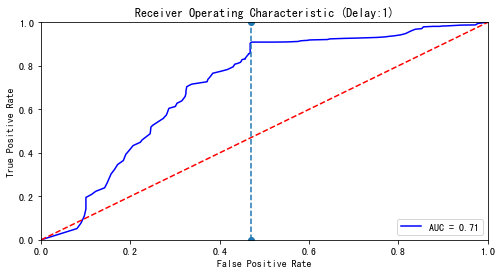

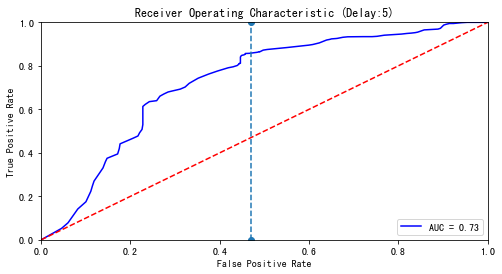

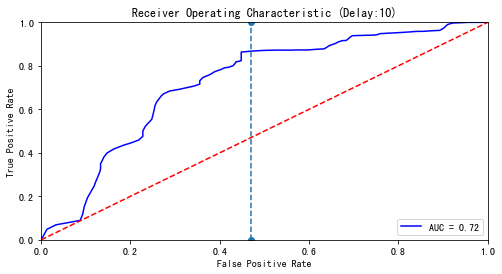

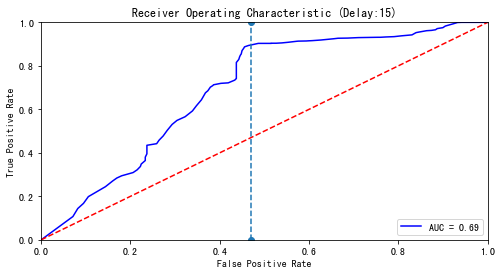

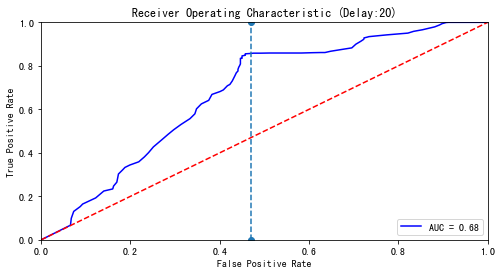

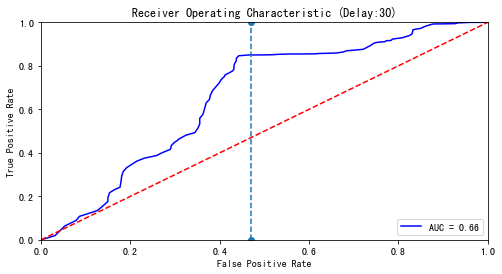

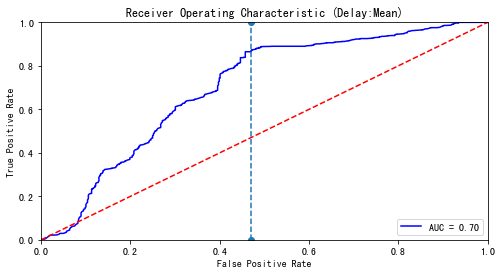

In [37]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

for delay in [1, 5, 10, 15, 20, 30, 'Mean']:

    df['PredictLabel' + str(delay) + '_2_int'] = df['PredictLabel' + str(delay)].apply(lambda x: intlabel(x, 0.47))
    confusionMatrix = confusion_matrix(df['bb'], df['PredictLabel' + str(delay) + '_2_int'])
    print(confusionMatrix)
    if confusionMatrix.shape[0] == 2:
        print((confusionMatrix[0,0]+confusionMatrix[1,1])/sum(sum(confusionMatrix)))
    else:
        print((confusionMatrix[1,1]+confusionMatrix[2,2])/sum(sum(confusionMatrix[1:, 1:])))
        
    preds = df['PredictLabel' + str(delay)]
    y_test = df['bb']
    # calculate the fpr and tpr for all thresholds of the classification
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    plt.figure(figsize=[8,4])
    plt.title('Receiver Operating Characteristic (Delay:' + str(delay) + ')')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.plot([0.47, 0.47], [0, 1],'o--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
        
df['quarterLabel'] = df['PredictLabel30'].apply(lambda x: intlabel(x, 0.3))

# Draw Graphs

# 實際牛熊

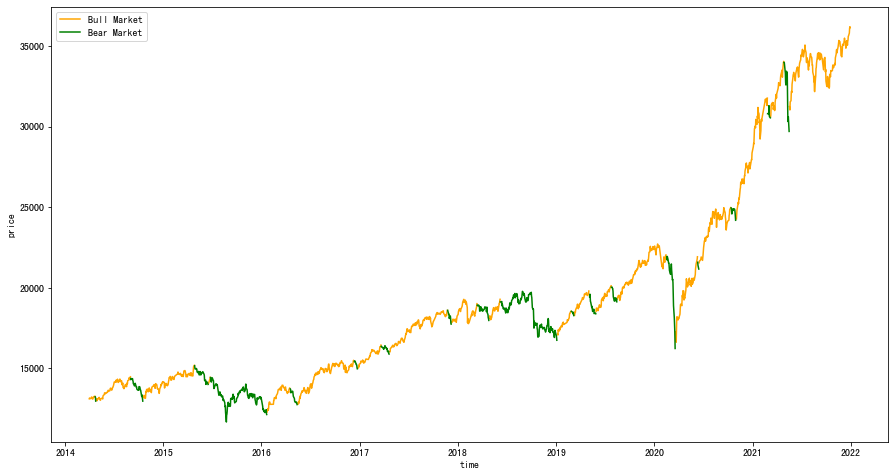

In [40]:
def drawBullLabel(dailyLabel):
    if dailyLabel[1] == True:
        return dailyLabel[0]
    else:
        return float('nan')
    
def drawBearLabel(dailyLabel):
    if dailyLabel[1] == False:
        return dailyLabel[0]
    else:
        return float('nan')

label = label[label['Date']>='2014/04/01']
label = label[label['Date']<'2022/01/01']
label = label.reset_index(drop=True)
    
drawBull = label[['close_adj', 'algoDefine']].apply(lambda x: drawBullLabel(x), axis=1)
drawBear = label[['close_adj', 'algoDefine']].apply(lambda x: drawBearLabel(x), axis=1)
import matplotlib.pyplot as plt

%matplotlib inline
fig = plt.figure(figsize=(15,8))
# fig = plt.figure()
ax = plt.axes()

# for i in label.index:
ax.plot(pd.to_datetime(label.Date), drawBull, label='Bull Market', color='orange')
ax.plot(pd.to_datetime(label.Date), drawBear, label='Bear Market', color='green')

ax.set_xlabel('time')  # Add an x-label to the axes.
ax.set_ylabel('price')  # Add a y-label to the axes.
ax.legend();  # Add a legend.

# Model所預測以季為單位的牛熊

Start	End

2015/05/31	2015/08/29

2015/11/30	2016/02/28

2017/03/31	2017/06/29

2017/11/30	2018/02/28

2018/03/31	2018/06/29

2018/08/31	2018/11/29

2018/11/30	2019/02/28

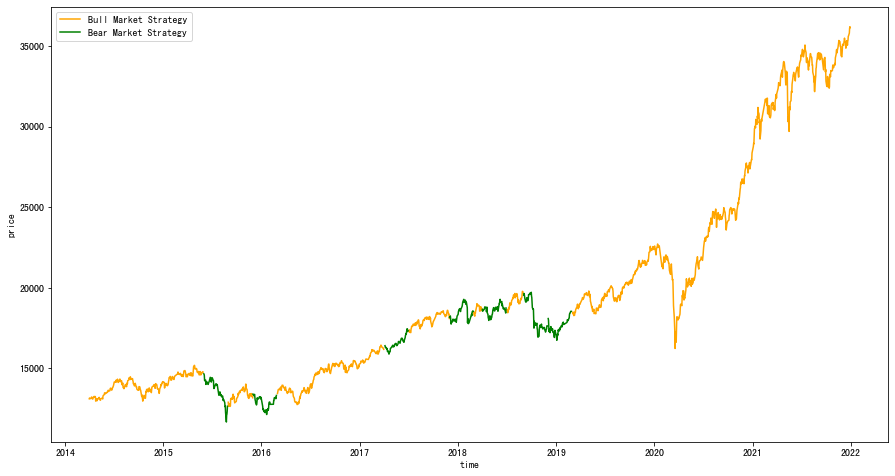

In [43]:
def drawBullLabel(dailyLabel):
    if dailyLabel[1] == True:
        return dailyLabel[0]
    else:
        return float('nan')
    
def drawBearLabel(dailyLabel):
    if dailyLabel[1] == False:
        return dailyLabel[0]
    else:
        return float('nan')

df['quarterLabel'] = 1
df.loc[df['Date']>datetime.date(2015, 5, 31), 'quarterLabel'] = 0
df.loc[df['Date']>datetime.date(2015, 8, 29), 'quarterLabel'] = 1
df.loc[df['Date']>datetime.date(2015, 11, 30), 'quarterLabel'] = 0
df.loc[df['Date']>datetime.date(2016, 2, 28), 'quarterLabel'] = 1
df.loc[df['Date']>datetime.date(2017, 3, 31), 'quarterLabel'] = 0
df.loc[df['Date']>datetime.date(2017, 6, 29), 'quarterLabel'] = 1
df.loc[df['Date']>datetime.date(2017, 11, 30), 'quarterLabel'] = 0
df.loc[df['Date']>datetime.date(2018, 2, 28), 'quarterLabel'] = 1
df.loc[df['Date']>datetime.date(2018, 3, 31), 'quarterLabel'] = 0
df.loc[df['Date']>datetime.date(2018, 6, 29), 'quarterLabel'] = 1
df.loc[df['Date']>datetime.date(2018, 8, 31), 'quarterLabel'] = 0
df.loc[df['Date']>datetime.date(2018, 11, 29), 'quarterLabel'] = 1
df.loc[df['Date']>datetime.date(2018, 11, 30), 'quarterLabel'] = 0
df.loc[df['Date']>datetime.date(2019, 2, 28), 'quarterLabel'] = 1

drawBull = df[['close_adj', 'quarterLabel']].apply(lambda x: drawBullLabel(x), axis=1)
drawBear = df[['close_adj', 'quarterLabel']].apply(lambda x: drawBearLabel(x), axis=1)
import matplotlib.pyplot as plt

%matplotlib inline
fig = plt.figure(figsize=(15,8))
# fig = plt.figure()
ax = plt.axes()

# for i in label.index:
ax.plot(pd.to_datetime(df.Date), drawBull, label='Bull Market Strategy', color='orange')
ax.plot(pd.to_datetime(df.Date), drawBear, label='Bear Market Strategy', color='green')

ax.set_xlabel('time')  # Add an x-label to the axes.
ax.set_ylabel('price')  # Add a y-label to the axes.
ax.legend();  # Add a legend.

# 延後n天的牛熊

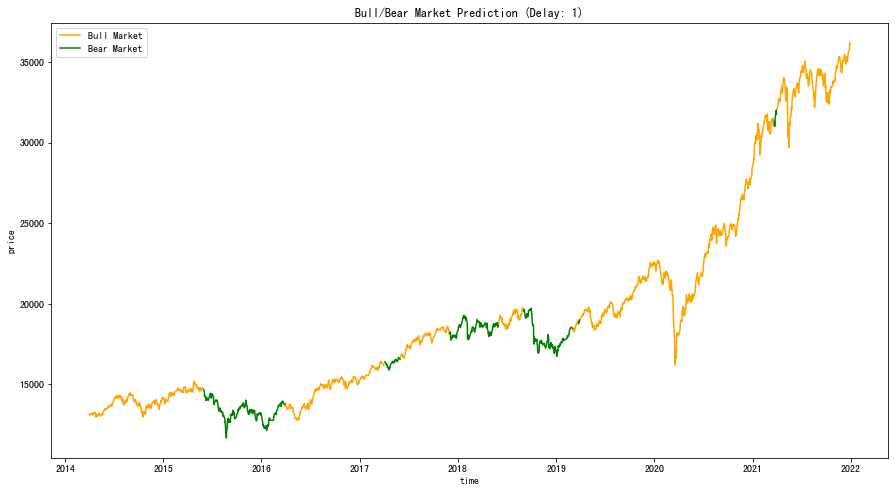

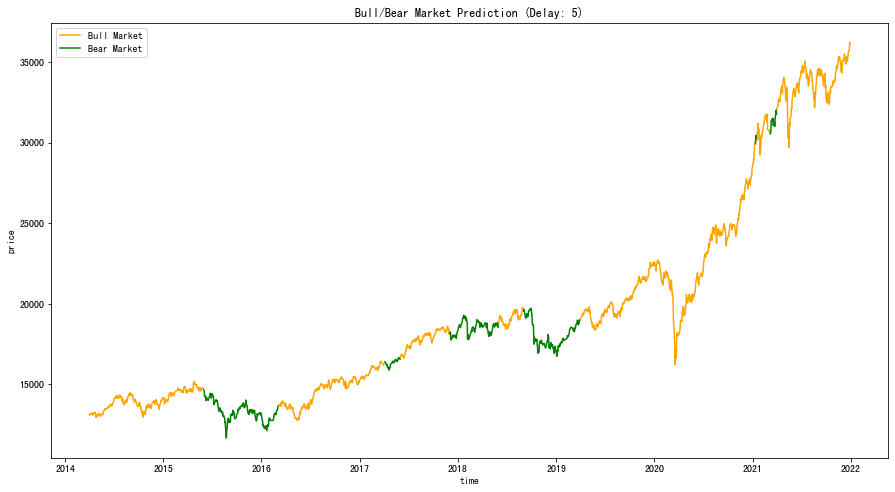

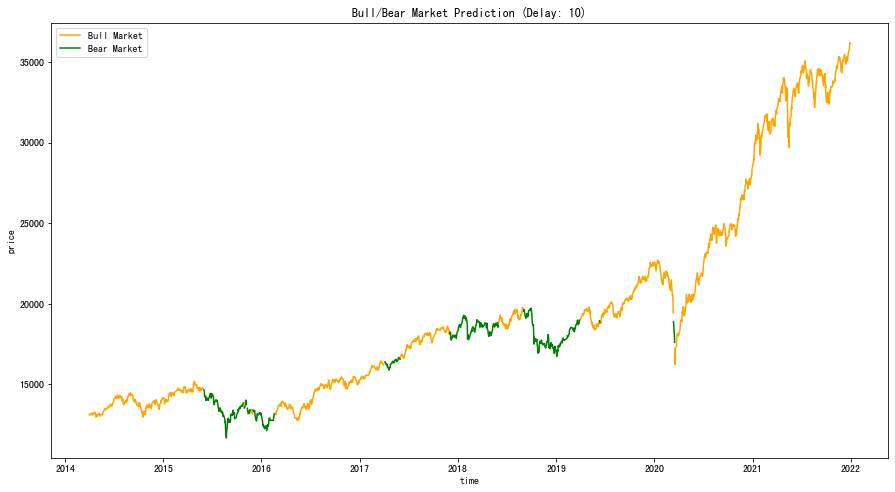

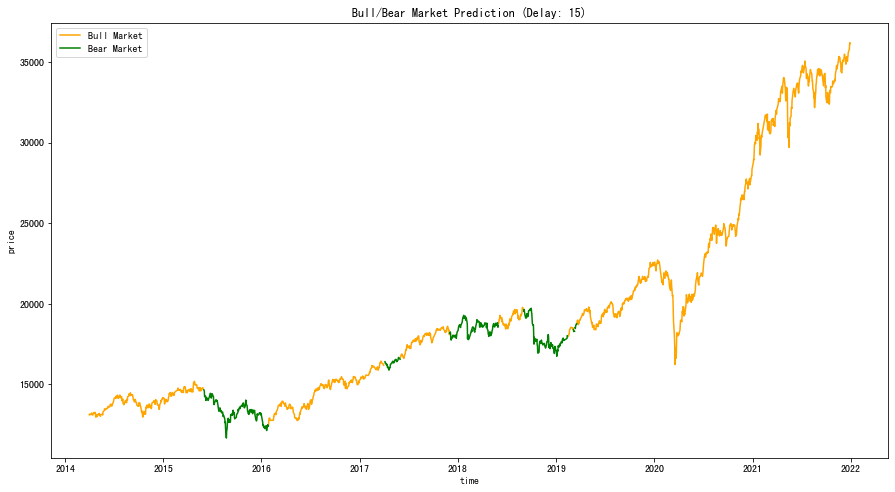

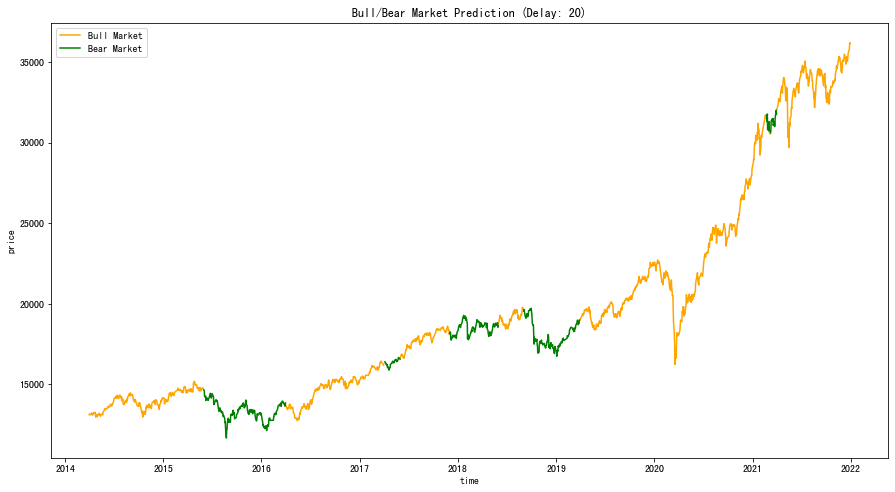

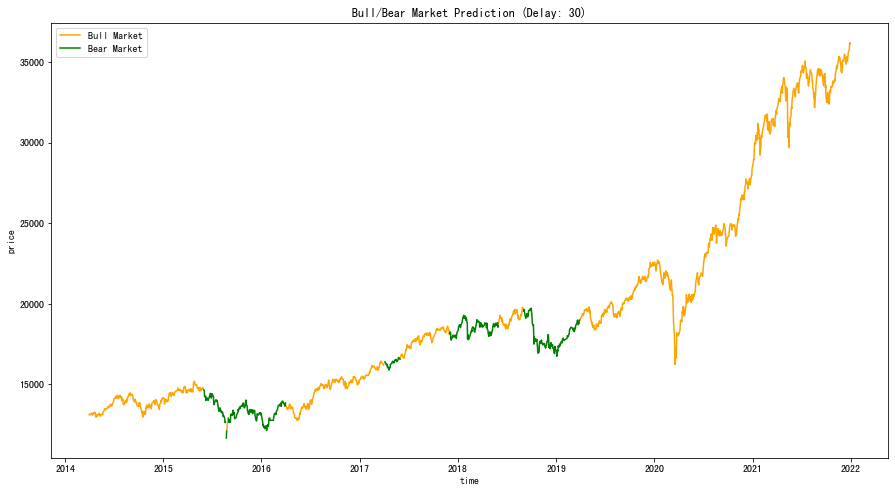

In [41]:
def drawBullLabel(dailyLabel):
    if dailyLabel[1] == 1:
        return dailyLabel[0]
    else:
        return float('nan')
    
def drawBearLabel(dailyLabel):
    if dailyLabel[1] == 0:
        return dailyLabel[0]
    else:
        return float('nan')

for delay in [1, 5, 10, 15, 20, 30]:

    tmp_df = df[df['Date']>=datetime.date(2014,4,1)]
    tmp_df = tmp_df[tmp_df['Date']<datetime.date(2022,1,1)]
    tmp_df = tmp_df.reset_index(drop=True)
#     tmp_df = df[df['Date']>='2014/04/01']
#     tmp_df = tmp_df[tmp_df['Date']<'2022/01/01']
#     tmp_df = tmp_df.reset_index(drop=True)

    drawBull = tmp_df[['close_adj', 'PredictLabel' + str(delay) + '_2_int']].apply(lambda x: drawBullLabel(x), axis=1)
    drawBear = tmp_df[['close_adj', 'PredictLabel' + str(delay) + '_2_int']].apply(lambda x: drawBearLabel(x), axis=1)
    import matplotlib.pyplot as plt

    # fig = plt.figure(figsize=(15,8))
    # ax = plt.axes()
    fig, ax = plt.subplots(figsize=(15,8))
    ax.set_title('Bull/Bear Market Prediction (Delay: ' + str(delay) + ')')

    # for i in label.index:
    ax.plot(pd.to_datetime(df.Date), np.array(drawBull), label='Bull Market', color='orange')
    ax.plot(pd.to_datetime(df.Date), np.array(drawBear), label='Bear Market', color='green')

    ax.set_xlabel('time')  # Add an x-label to the axes.
    ax.set_ylabel('price')  # Add a y-label to the axes.
    ax.legend();  # Add a legend.

[[ 277  272]
 [ 203 1152]]
0.7505252100840336
[[ 294  255]
 [ 203 1152]]
0.759453781512605
[[ 309  240]
 [ 224 1131]]
0.7563025210084033
[[328 221]
 [359 996]]
0.6953781512605042


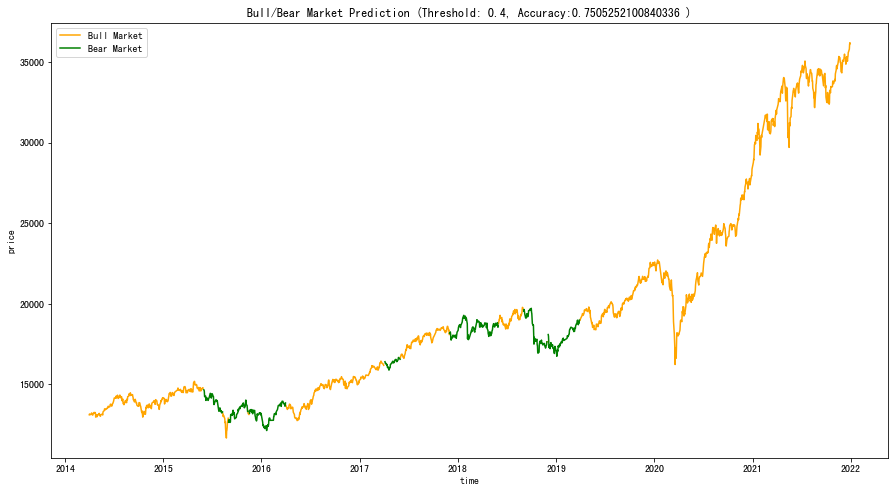

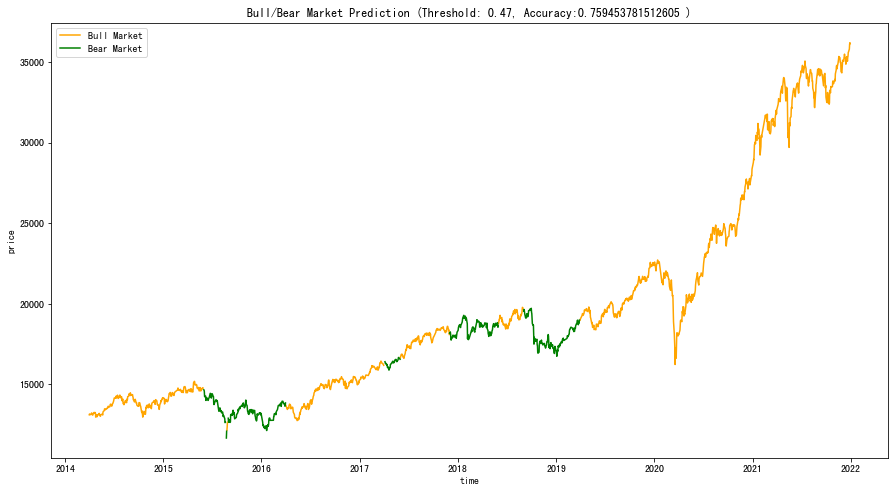

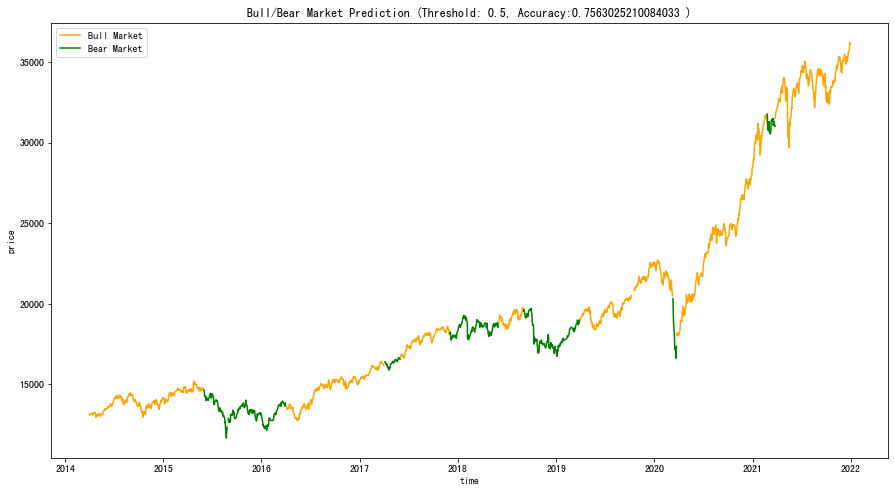

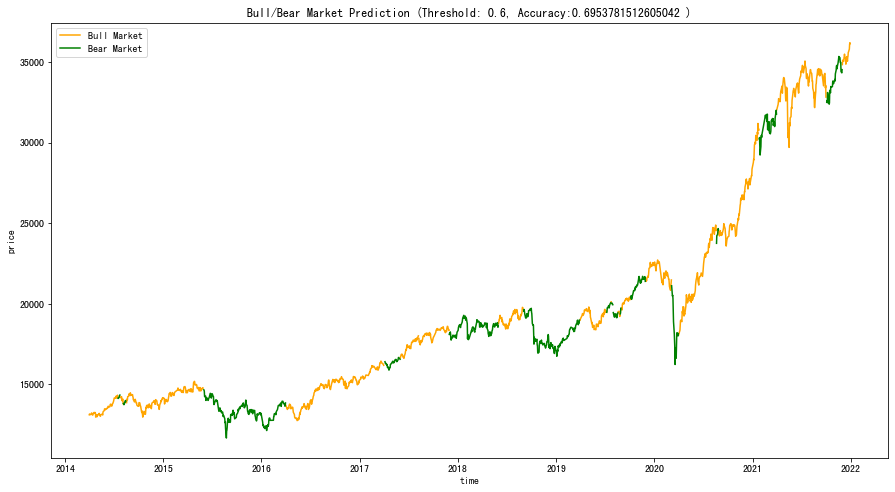

In [42]:
delay = 30
for thres in [0.4, 0.47, 0.5, 0.6]:
    
    df['PredictLabel' + str(delay) + '_2_int'] = df['PredictLabel' + str(delay)].apply(lambda x: intlabel(x, thres))
    confusionMatrix = confusion_matrix(df['bb'], df['PredictLabel' + str(delay) + '_2_int'])
    print(confusionMatrix)
    if confusionMatrix.shape[0] == 2:
        print((confusionMatrix[0,0]+confusionMatrix[1,1])/sum(sum(confusionMatrix)))
    else:
        print((confusionMatrix[1,1]+confusionMatrix[2,2])/sum(sum(confusionMatrix[1:, 1:])))
        
    tmp_df = df[df['Date']>=datetime.date(2014,4,1)]
    tmp_df = tmp_df[tmp_df['Date']<datetime.date(2022,1,1)]
    tmp_df = tmp_df.reset_index(drop=True)
#     tmp_df = df[df['Date']>='2014/04/01']
#     tmp_df = tmp_df[tmp_df['Date']<'2022/01/01']
#     tmp_df = tmp_df.reset_index(drop=True)

    drawBull = tmp_df[['close_adj', 'PredictLabel' + str(delay) + '_2_int']].apply(lambda x: drawBullLabel(x), axis=1)
    drawBear = tmp_df[['close_adj', 'PredictLabel' + str(delay) + '_2_int']].apply(lambda x: drawBearLabel(x), axis=1)
    import matplotlib.pyplot as plt

    # fig = plt.figure(figsize=(15,8))
    # ax = plt.axes()
    fig, ax = plt.subplots(figsize=(15,8))
    ax.set_title('Bull/Bear Market Prediction (Threshold: ' + str(thres) + ', Accuracy:' + str((confusionMatrix[0,0]+confusionMatrix[1,1])/sum(sum(confusionMatrix))) + ' )')
    
    # for i in label.index:
    ax.plot(pd.to_datetime(df.Date), np.array(drawBull), label='Bull Market', color='orange')
    ax.plot(pd.to_datetime(df.Date), np.array(drawBear), label='Bear Market', color='green')

    ax.set_xlabel('time')  # Add an x-label to the axes.
    ax.set_ylabel('price')  # Add a y-label to the axes.
    ax.legend();  # Add a legend.

In [43]:
for i in label.index:
    print(i, label.loc[i, 'Date'], label.loc[i, 'close_adj'], label.loc[i, 'bb'])

0 2014/04/01 13109.8 1
1 2014/04/02 13157.54 1
2 2014/04/03 13132.55 1
3 2014/04/07 13114.68 1
4 2014/04/08 13132.12 1
5 2014/04/09 13194.65 1
6 2014/04/10 13220.54 1
7 2014/04/11 13161.37 1
8 2014/04/14 13086.56 1
9 2014/04/15 13174.17 1
10 2014/04/16 13184.68 1
11 2014/04/17 13214.73 1
12 2014/04/18 13247.97 1
13 2014/04/21 13225.12 1
14 2014/04/22 13259.86 1
15 2014/04/23 13233.58 0
16 2014/04/24 13216.64 0
17 2014/04/25 12963.49 0
18 2014/04/28 13016.08 1
19 2014/04/29 13108.27 1
20 2014/04/30 12989.08 1
21 2014/05/02 13101.2 1
22 2014/05/05 13105.79 1
23 2014/05/06 13168.26 1
24 2014/05/07 13139.93 1
25 2014/05/08 13195.79 1
26 2014/05/09 13134.9 1
27 2014/05/12 13015.09 1
28 2014/05/13 13028.88 1
29 2014/05/14 13113.43 1
30 2014/05/15 13121.71 1
31 2014/05/16 13133.24 1
32 2014/05/19 13150.15 1
33 2014/05/20 13132.26 1
34 2014/05/21 13095.15 1
35 2014/05/22 13253.58 1
36 2014/05/23 13310.6 1
37 2014/05/26 13351.82 1
38 2014/05/27 13380.3 1
39 2014/05/28 13478.45 1
40 2014/05/29 1

628 2016/10/20 15359.37 1
629 2016/10/21 15341.77 1
630 2016/10/24 15368.04 1
631 2016/10/25 15472.36 1
632 2016/10/26 15433.79 1
633 2016/10/27 15330.43 1
634 2016/10/28 15342.58 1
635 2016/10/31 15314.95 1
636 2016/11/01 15286.23 1
637 2016/11/02 15065.93 1
638 2016/11/03 14947.94 1
639 2016/11/04 14949.46 1
640 2016/11/07 15150.06 1
641 2016/11/08 15195.55 1
642 2016/11/09 14743.45 1
643 2016/11/10 15087.99 1
644 2016/11/11 14767.47 1
645 2016/11/14 14738.84 1
646 2016/11/15 14723.39 1
647 2016/11/16 14774.83 1
648 2016/11/17 14829.29 1
649 2016/11/18 14851.59 1
650 2016/11/21 14904.87 1
651 2016/11/22 15057.0 1
652 2016/11/23 15130.93 1
653 2016/11/24 15088.05 1
654 2016/11/25 15100.53 1
655 2016/11/28 15204.69 1
656 2016/11/29 15155.46 1
657 2016/11/30 15235.13 1
658 2016/12/01 15272.76 1
659 2016/12/02 15150.68 1
660 2016/12/05 15103.16 1
661 2016/12/06 15251.72 1
662 2016/12/07 15273.34 1
663 2016/12/08 15457.96 1
664 2016/12/09 15485.68 1
665 2016/12/12 15415.22 0
666 2016/12/1

1338 2019/09/10 19973.71 1
1339 2019/09/11 20042.62 1
1340 2019/09/12 20111.71 1
1341 2019/09/16 20248.6 1
1342 2019/09/17 20204.79 1
1343 2019/09/18 20306.99 1
1344 2019/09/19 20274.61 1
1345 2019/09/20 20339.81 1
1346 2019/09/23 20319.98 1
1347 2019/09/24 20318.25 1
1348 2019/09/25 20235.92 1
1349 2019/09/26 20233.0 1
1350 2019/09/27 20154.27 1
1351 2019/10/01 20411.12 1
1352 2019/10/02 20377.6 1
1353 2019/10/03 20243.63 1
1354 2019/10/04 20278.19 1
1355 2019/10/07 20353.73 1
1356 2019/10/08 20506.82 1
1357 2019/10/09 20269.96 1
1358 2019/10/14 20599.41 1
1359 2019/10/15 20682.89 1
1360 2019/10/16 20777.88 1
1361 2019/10/17 20822.69 1
1362 2019/10/18 20810.3 1
1363 2019/10/21 20817.62 1
1364 2019/10/22 20979.74 1
1365 2019/10/23 20920.95 1
1366 2019/10/24 21070.74 1
1367 2019/10/25 21026.13 1
1368 2019/10/28 21061.65 1
1369 2019/10/29 21096.75 1
1370 2019/10/30 21183.15 1
1371 2019/10/31 21142.99 1
1372 2019/11/01 21218.98 1
1373 2019/11/04 21513.38 1
1374 2019/11/05 21675.66 1
1375 

# 指標：年化報酬IRR 波動度 max drawdown、 sharpe ratio、 sortino ratio

In [44]:
MultiFactor_Performance = {}
Fifty_Performance = {}

### IRR

In [45]:
MultiFactor_Performance['IRR'] = cumu_return.iloc[-1, 0]**(1/9) - 1
Fifty_Performance['IRR'] = cumu_return.iloc[-1, 1]**(1/9) - 1

### Volality

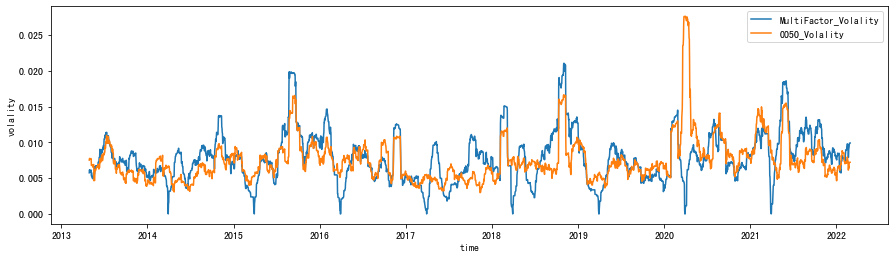

In [46]:
volality_df = copy.copy(return_df)
volality_df['MultiFactor_Portfolio'] = volality_df['MultiFactor_Portfolio'].rolling(30).apply(lambda x : x.std())
volality_df['0050'] = volality_df['0050'].rolling(30).apply(lambda x : x.std())

fig = plt.figure(figsize=(15,4))
ax = plt.axes()
# ax.plot(return_df.columns, return_df.iloc[0, :], label='daily')
ax.plot(volality_df.index, volality_df.iloc[:, 0], label='MultiFactor_Volality')
# ax.plot(return_df.columns, return_df.iloc[1, :], label='0050_daily')
ax.plot(volality_df.index, volality_df.iloc[:, 1], label='0050_Volality')
ax.set_xlabel('time')  # Add an x-label to the axes.
ax.set_ylabel('volality')  # Add a y-label to the axes.
ax.legend();  # Add a legend.

In [131]:
return_df_2 = return_df.loc[ (return_df['0050']!=1.00).values | (return_df['MultiFactor_Portfolio']!=1.00).values ]

### Sharpe Ratio

In [155]:
# for year in range(2013, 2022):
#     return_tmpdf = return_df_2.loc[return_df_2.index <= datetime.date(year, 12, 31)]
#     return_tmpdf = return_tmpdf[return_tmpdf.index >= datetime.date(year, 1, 1)]
# #     print(return_tmpdf)
#     print(return_tmpdf.shape)
#     nDay = return_tmpdf.shape[0]
#     rf = 1+0.025/nDay
#     print((np.mean(return_tmpdf.iloc[:, 0])-rf) / np.std(return_tmpdf.iloc[:, 0]) * (nDay**(1/2)))
#     print((np.mean(return_tmpdf.iloc[:, 1])-rf) / np.std(return_tmpdf.iloc[:, 1]) * (nDay**(1/2)), end='\n\n')

In [162]:
# nDay = return_df_2.shape[0]
rf = 1 + 0.025/252
MultiFactor_Performance['SharpeRatio'] = np.mean(return_df_2.iloc[:, 0]-rf) / np.std(return_df.iloc[:, 0]) * (252**(1/2))
Fifty_Performance['SharpeRatio'] = np.mean(return_df_2.iloc[:, 1]-rf) / np.std(return_df.iloc[:, 1]) * (252**(1/2))

### Sortino Ratio

In [163]:
MultiFactor_Performance['SortinoRatio'] = np.mean(return_df_2.iloc[:, 0]-rf) / np.std(return_df.loc[return_df['MultiFactor_Portfolio'] < 1, 'MultiFactor_Portfolio']) * (252**(1/2))
Fifty_Performance['SortinoRatio'] = np.mean(return_df_2.iloc[:, 1]-rf) / np.std(return_df.loc[return_df['0050'] < 1, '0050']) * (252**(1/2))

## bull-bear的MV權重績效

In [54]:
MultiFactor_Performance

{'IRR': 0.3349430401697602,
 'SharpeRatio': 0.09742330302453256,
 'SortinoRatio': 0.10950114292728388}

In [55]:
Fifty_Performance

{'IRR': 0.14288979378583466,
 'SharpeRatio': 0.0495936749963751,
 'SortinoRatio': 0.05889314721397064}

## 都是long的IRIC權重績效

In [164]:
MultiFactor_Performance

{'IRR': 0.3349430401697602,
 'SharpeRatio': 2.1090240400313998,
 'SortinoRatio': 2.507725976230805}

In [165]:
Fifty_Performance

{'IRR': 0.14288979378583466,
 'SharpeRatio': 0.9728306163130953,
 'SortinoRatio': 1.081887634549988}